In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
import time
from sklearn.decomposition import TruncatedSVD
import pandas as pd
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, make_scorer
from sklearn.model_selection import cross_val_score
import string
import re
from sklearn.linear_model import RidgeClassifier
import nltk

# 1. Загрузка и вывод статистики

In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
print("Train has", train.shape[0], "rows and", train.shape[1],"columns")
print("Test has", test.shape[0], "rows and", test.shape[1],"columns")

Train has 7613 rows and 5 columns
Test has 3263 rows and 4 columns


In [3]:
pd.DataFrame.describe(train)

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [4]:
pd.DataFrame.info(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


### Первые 30 уникальных значений keyword и их общее количество в test и train

In [6]:
print("TRAIN keyword", pd.unique(train['keyword'])[1:30], "...\n")
print('TRAIN kw Length =',len(pd.unique(train['keyword'])), "\n")
print("TEST keyword", pd.unique(test['keyword'])[1:30], "...\n")
print('TEST kw Length =',len(pd.unique(test['keyword'])))

TRAIN keyword ['ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'] ...

TRAIN kw Length = 222 

TEST keyword ['ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'] ...

TEST kw Length = 222


### Первые 30 уникальных значений location и их общее количество в test и train

In [7]:
print("TRAIN location", pd.unique(train['location'])[1:30], "...\n")
print('TRAIN lc Length =', len(pd.unique(train['location'])),"\n")
print("TEST location", pd.unique(test['location'])[1:30], "...\n")
print('TEST loc Length =', len(pd.unique(test['location'])))

TRAIN location ['Birmingham' 'Est. September 2012 - Bristol' 'AFRICA' 'Philadelphia, PA'
 'London, UK' 'Pretoria' 'World Wide!!' 'Paranaque City' 'Live On Webcam'
 'milky way' 'GREENSBORO,NORTH CAROLINA' 'England.'
 'Sheffield Township, Ohio' 'India' 'Barbados' 'Anaheim' 'Abuja' 'USA'
 'South Africa' 'Sao Paulo, Brazil' 'hollywoodland '
 'Edmonton, Alberta - Treaty 6' 'Inang Pamantasan'
 'Twitter Lockout in progress' 'Concord, CA' 'Calgary, AB' 'San Francisco'
 'CLVLND' 'Nashville, TN'] ...

TRAIN lc Length = 3342 

TEST location ['London' "Niall's place | SAF 12 SQUAD |" 'NIGERIA' 'Live On Webcam'
 'Los Angeles, Califnordia' 'threeonefive. ' 'Washington State'
 'Whoop Ass, Georgia' 'India' 'scarborough, ontario'
 '121 N La Salle St, Suite 500' 'Wandering' 'Homewood, PA' 'USA'
 'Massachusetts' 'Bexhill' 'Anime World' 'Cowtown, Caliii !!'
 'All Motorways, UK' 'Frankfurt, Germany' 'Gresham, OR' 'Las Vegas '
 'Midland, Mi' 'SÌ£o Vicente, SÌ£o Paulo' 'Vault 101, Fallout'
 'Switzerland' 'Ca

### Проверка различий в наборах уникальных значений keyword в test и train

In [8]:
for i in pd.unique(train['keyword']):
    if i not in pd.unique(test['keyword']):
        print(i)

nan


In [ ]:
for i in pd.unique(train['keyword']):
    if i not in pd.unique(test['keyword']):
        print(i)

### Количество значений NaN в test и train по столбцам

In [9]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [10]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

### Значения целевой переменной

In [11]:
print("target", pd.unique(train['target']), "\n") 

target [1 0] 



### Количество примеров для значений целевой переменной в train

In [12]:
import matplotlib.pyplot as plt
target_pivot = train.pivot_table(index="target", values='id', aggfunc='count')
print(target_pivot)
target_pivot.plot.bar()
plt.title('Amount of all non-disaster and disaster tweets')
plt.show()

          id
target      
0       4342
1       3271


<Figure size 640x480 with 1 Axes>

In [13]:
def F(n):
    return round(n,3)

### Анализ строк столбца text по целевой переменной в train

In [14]:
len_0 = F(np.mean([len(i) for i in train[(train.target == 0)].text]))
max_0 = F(np.max([len(i) for i in train[(train.target == 0)].text]))
len_1 = F(np.mean([len(i) for i in train[(train.target == 1)].text]))
max_1 = F(np.max([len(i) for i in train[(train.target == 1)].text]))
words_mean_0 = F(np.mean([len(i.split()) for i in train[(train.target == 0)].text]))
words_max_0 = F(np.max([len(i.split()) for i in train[(train.target == 0)].text]))
words_mean_1 = F(np.mean([len(i.split()) for i in train[(train.target == 1)].text]))
words_max_1 = F(np.max([len(i.split()) for i in train[(train.target == 1)].text]))
d = {'target': [0,1], 'mean str length': [len_0, len_1], 'max str length': [max_0, max_1], 
    'mean words amount': [words_mean_0, words_mean_1], 'max words amount': [words_max_0, words_max_1]}
df = pd.DataFrame(data=d)
df

,target,mean str length,max str length,mean words amount,max words amount
0,0,95.707,157,14.705,31
1,1,108.113,151,15.168,30


In [15]:
train.fillna('NaN', inplace=True)   
keywords_count = {}
for i in range(len([i for i in train.keyword])):
    if train.keyword[i] in keywords_count:
        if train.target[i] == 0:
            keywords_count[train.keyword[i]][0] += 1
        else:
            keywords_count[train.keyword[i]][1] += 1
    else:
        if train.target[i] == 0:
            keywords_count[train.keyword[i]] = [1,0]
        else:
            keywords_count[train.keyword[i]] = [0,1]
                


In [16]:
percents = {}
for i in range(len(keywords_count)):
    percents[list(keywords_count.keys())[i]] = list(keywords_count.values())[i][0]/(list(keywords_count.values())[i][0] + list(keywords_count.values())[i][1])


percents = {k: v for k, v in sorted(percents.items(), key=lambda item: item[1])}
percents

for i in range(len(percents)):
    percents[list(percents.keys())[i]] = [list(percents.values())[i], 1 - list(percents.values())[i]]
    


### График зависимости целевой переменной от значения keyword

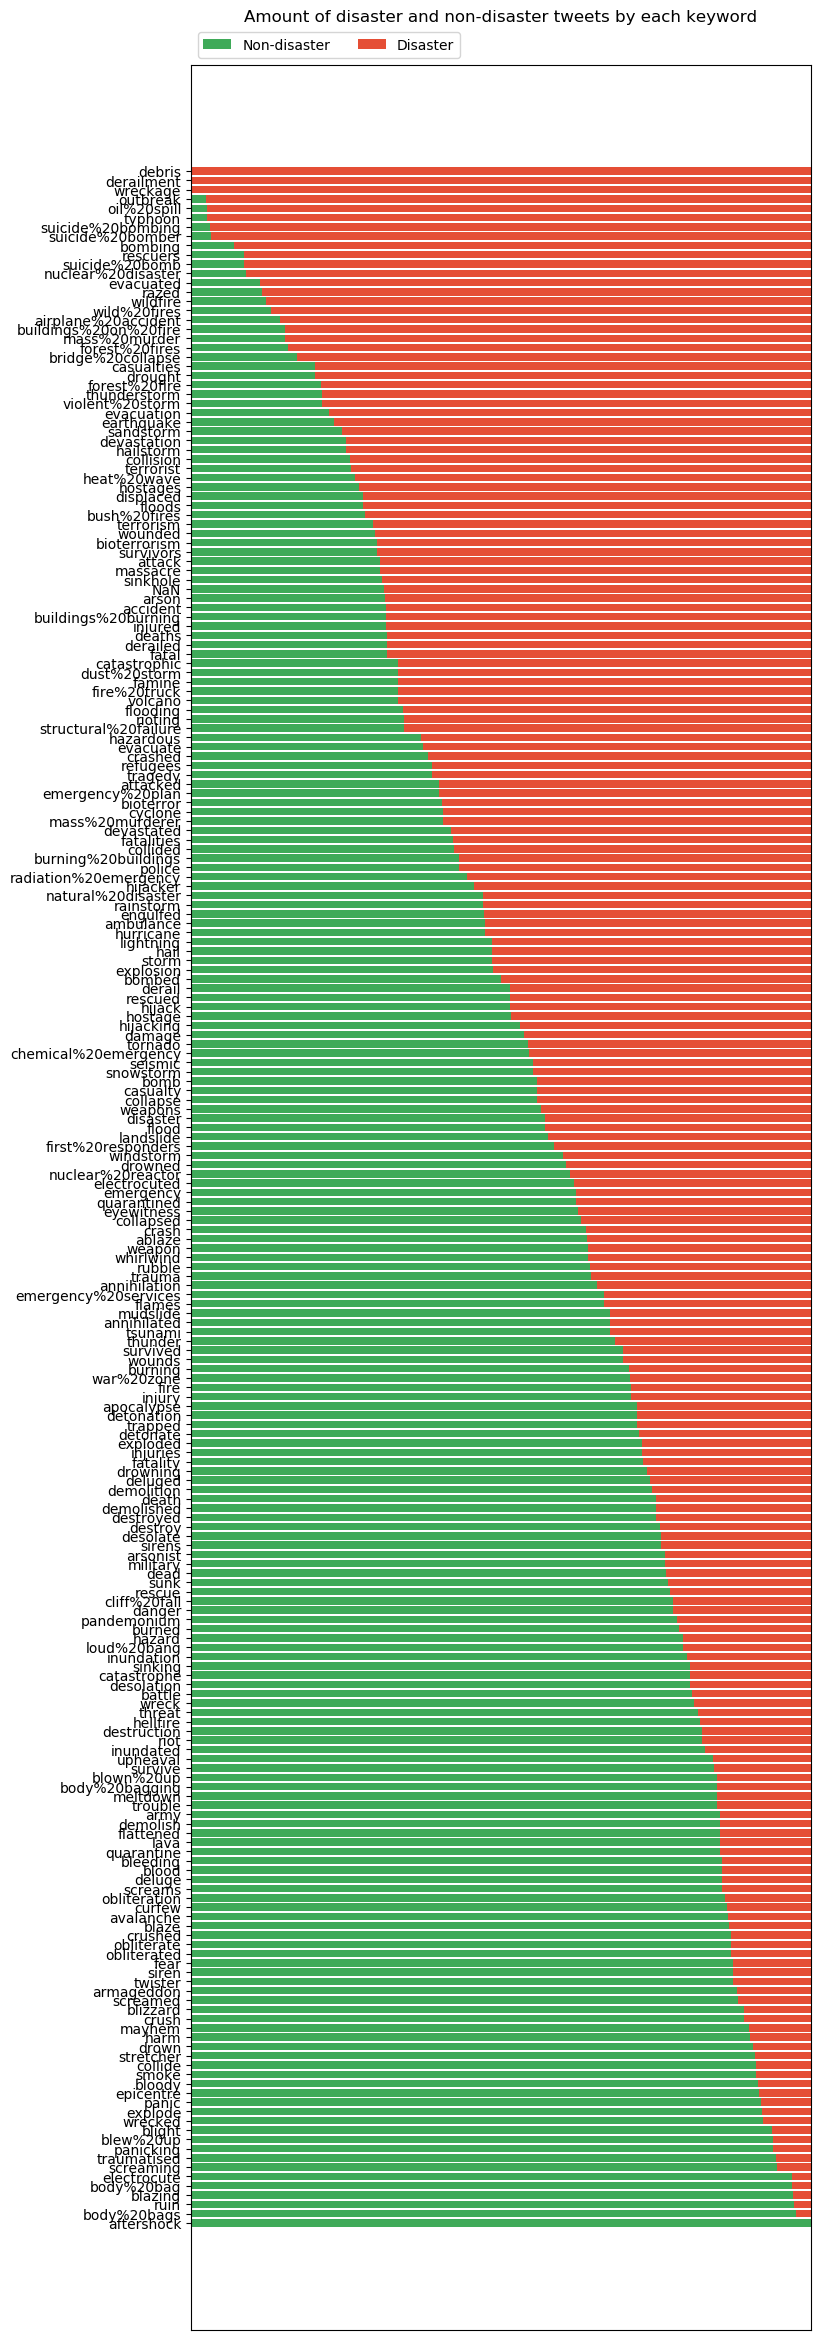

In [18]:

category_names = ['Non-disaster','Disaster']
results = percents


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.85, 0.15, data.shape[1]))

    fig, ax = plt.subplots(figsize=(8, 30), dpi=100)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.8,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'darkgrey'
        #for y, (x, c) in enumerate(zip(xcenters, widths)):
            #ax.text(x, y, str(int(c)), ha='center', va='center',
             #       color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')

    return fig, ax


survey(results, category_names)
plt.title('Amount of disaster and non-disaster tweets by each keyword\n\n')
plt.show()

# 2. Обучение и тестирование baseline

In [3]:
train_ = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
train_.fillna('NaN', inplace=True)    
test.fillna('NaN', inplace=True)  
train, val = train_test_split(train_, train_size = 0.8, test_size = 0.2, random_state = 42)
print(len(train))
print(len(val))

6090
1523


In [12]:
def Scores(Estimator, X, y):
    print("accuracy", F(accuracy_score(y, Estimator.predict(X))))
    print("precision", F(precision_score(y, Estimator.predict(X))))
    print("recall", F(recall_score(y, Estimator.predict(X))))
    print("F1", F(f1_score(y, Estimator.predict(X), average='weighted')))    
    print('Confusion matrix \n', confusion_matrix(y, Estimator.predict(X)))

In [13]:
def CV_scores(Estimator, X, y):    
    scores = list(map(float, cross_val_score(Estimator, X, y, cv=20, scoring = make_scorer(f1_score,average='weighted'))))
    scores = [round(num, 3) for num in scores]
    #print("CV scores:", scores)
    print("CV Max = " + str(max(scores)))
    print("CV Min = " + str(min(scores)))
    print("CV Mean = " + str(round(np.mean(scores),3)))

### RidgeClassifier (baseline)

In [9]:
vect = CountVectorizer()
train_vectors = vect.fit_transform(train['keyword'] + ' ' + train["text"])
val_vectors = vect.transform(val["keyword"] + ' ' + val["text"])

Ridge = RidgeClassifier(random_state=42)
Ridge.fit(train_vectors, train['target'])

Scores(Ridge, val_vectors, val["target"])
CV_scores(Ridge, train_vectors, train['target'])

accuracy 0.793
precision 0.779
recall 0.718
F1 0.792
Confusion matrix 
 [[742 132]
 [183 466]]
CV Max = 0.827
CV Min = 0.738
CV Mean = 0.781


In [10]:
vect = TfidfVectorizer()
train_vectors = vect.fit_transform(train['keyword'] + ' ' + train["text"])
val_vectors = vect.transform(val["keyword"] + ' ' + val["text"])

Ridge = RidgeClassifier(random_state=42)
Ridge.fit(train_vectors, train['target'])

Scores(Ridge, val_vectors, val["target"])
CV_scores(Ridge, train_vectors, train['target'])

accuracy 0.793
precision 0.764
recall 0.743
F1 0.792
Confusion matrix 
 [[725 149]
 [167 482]]
CV Max = 0.864
CV Min = 0.765
CV Mean = 0.804


# 3. Предварительная обработка данных

### Очистка

In [133]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

train.fillna('0', inplace=True)    
test.fillna('0', inplace=True)

train.drop_duplicates(subset = ["text"], keep="first", inplace=True)

#убираем все символы пунктуации
def remove_punct(text):
    text = text.lower()
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

#удаляем символ пробела (в столбце keyword)
def remove_percent(text):
    text = text.replace('%20', '')
    return text

#убираем символы переноса строки (\n встречаются в text)
def remove_new_str(text):
    text = text.replace('\n',' ')
    return text

#убираем из text всё похожее на ссылку
def remove_http(text):
    text = text.lower()
    result = re.sub(r'(\S)*(\x89)(\S)*', '', text)
    result = re.sub(r'http(\S)*', '', result)   
    result = re.sub(r'x\d*', '', result)
    return result    

#убираем все цифры
def remove_digits(text):
    result = re.sub(r'\d', '', text)
    return result   

train['keyword'] = train['keyword'].apply(lambda x: remove_percent(x))
test['keyword'] = test['keyword'].apply(lambda x: remove_percent(x))

train['keyword'] = train['keyword'].apply(lambda x: remove_punct(x))
test['keyword'] = test['keyword'].apply(lambda x: remove_punct(x))

train['text'] = train['text'].apply(lambda x: remove_new_str(x))
test['text'] = test['text'].apply(lambda x: remove_new_str(x))

train['text'] = train['text'].apply(lambda x: remove_punct(x))
test['text'] = test['text'].apply(lambda x: remove_punct(x))

train['text'] = train['text'].apply(lambda x: remove_http(x))
test['text'] = test['text'].apply(lambda x: remove_http(x))

train['text'] = train['text'].apply(lambda x: remove_digits(x))
test['text'] = test['text'].apply(lambda x: remove_digits(x))

#train.head(500)[300:500]

In [134]:
train_val, val = train_test_split(train, train_size = 0.8, test_size = 0.2, random_state = 42)
vect = TfidfVectorizer()
train_vectors = vect.fit_transform(train_val['keyword'] + ' ' + train_val["text"])
val_vectors = vect.transform(val["keyword"] + ' ' + val["text"])

Ridge = RidgeClassifier(random_state=42)
Ridge.fit(train_vectors, train_val['target'])

Scores(Ridge, val_vectors, val["target"])
CV_scores(Ridge, train_vectors, train_val['target'])

accuracy 0.795
precision 0.779
recall 0.713
F1 0.794
Confusion matrix 
 [[747 127]
 [180 447]]
CV Max = 0.867
CV Min = 0.768
CV Mean = 0.805


### Токенизация

In [88]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

#добавляем keyword в text
train['all'] = train['keyword'] + ' ' + train['text']
test['all'] = test['keyword'] + ' ' + test['text']

#выполняем токенизацию
train['all_tokenized'] = train['all'].apply(lambda x: tokenize(x.lower()))
test['all_tokenized'] = test['all'].apply(lambda x: tokenize(x.lower()))

train.head()

,id,keyword,location,text,target,all,all_tokenized
0,1,0,0,our deeds are the reason of this earthquake ma...,1,0 our deeds are the reason of this earthquake ...,"[0, our, deeds, are, the, reason, of, this, ea..."
1,4,0,0,forest fire near la ronge sask canada,1,0 forest fire near la ronge sask canada,"[0, forest, fire, near, la, ronge, sask, canada]"
2,5,0,0,all residents asked to shelter in place are be...,1,0 all residents asked to shelter in place are ...,"[0, all, residents, asked, to, shelter, in, pl..."
3,6,0,0,people receive wildfires evacuation orders in...,1,0 people receive wildfires evacuation orders ...,"[0, people, receive, wildfires, evacuation, or..."
4,7,0,0,just got sent this photo from ruby alaska as s...,1,0 just got sent this photo from ruby alaska as...,"[0, just, got, sent, this, photo, from, ruby, ..."


### Удаление стоп-слов

In [89]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english') #Все английские стоп-слова
#stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sevastyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [90]:
def remove_stopwords(tokens):
    removed = [word for word in tokens if word not in stopwords]
    return removed

train['all_no_stopwords'] = train['all_tokenized'].apply(lambda x: remove_stopwords(x))
test['all_no_stopwords'] = test['all_tokenized'].apply(lambda x: remove_stopwords(x))

train.head()

,id,keyword,location,text,target,all,all_tokenized,all_no_stopwords
0,1,0,0,our deeds are the reason of this earthquake ma...,1,0 our deeds are the reason of this earthquake ...,"[0, our, deeds, are, the, reason, of, this, ea...","[0, deeds, reason, earthquake, may, allah, for..."
1,4,0,0,forest fire near la ronge sask canada,1,0 forest fire near la ronge sask canada,"[0, forest, fire, near, la, ronge, sask, canada]","[0, forest, fire, near, la, ronge, sask, canada]"
2,5,0,0,all residents asked to shelter in place are be...,1,0 all residents asked to shelter in place are ...,"[0, all, residents, asked, to, shelter, in, pl...","[0, residents, asked, shelter, place, notified..."
3,6,0,0,people receive wildfires evacuation orders in...,1,0 people receive wildfires evacuation orders ...,"[0, people, receive, wildfires, evacuation, or...","[0, people, receive, wildfires, evacuation, or..."
4,7,0,0,just got sent this photo from ruby alaska as s...,1,0 just got sent this photo from ruby alaska as...,"[0, just, got, sent, this, photo, from, ruby, ...","[0, got, sent, photo, ruby, alaska, smoke, wil..."


In [92]:
def make_strings(tokens):
    string = [word for word in tokens]
    return " ".join(string)

train['all_stop_strings'] = train['all_no_stopwords'].apply(lambda x: make_strings(x))
test['all_stop_strings'] = test['all_no_stopwords'].apply(lambda x: make_strings(x))

train.head()

train_val, val = train_test_split(train, train_size = 0.8, test_size = 0.2, random_state = 42)
vect = TfidfVectorizer()
train_vectors = vect.fit_transform(train_val['all_stop_strings'])
val_vectors = vect.transform(val['all_stop_strings'])

Ridge = RidgeClassifier(random_state=42)
Ridge.fit(train_vectors, train_val['target'])

Scores(Ridge, val_vectors, val["target"])
CV_scores(Ridge, train_vectors, train_val['target'])

accuracy 0.795
precision 0.777
recall 0.716
F1 0.794
Confusion matrix 
 [[745 129]
 [178 449]]
CV scores: [0.768, 0.81, 0.784, 0.801, 0.803, 0.869, 0.772, 0.791, 0.822, 0.792, 0.79, 0.815, 0.768, 0.798, 0.806, 0.781, 0.76, 0.842, 0.804, 0.769]
Max = 0.869
Min = 0.76
Mean = 0.797


### Лемматизация

In [93]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizing(tokens):
    text = [wn.lemmatize(word) for word in tokens]
    return " ".join(text)

train['all_lemmatized'] = train['all_no_stopwords'].apply(lambda x: lemmatizing(x))
test['all_lemmatized'] = test['all_no_stopwords'].apply(lambda x: lemmatizing(x))

train.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sevastyan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,keyword,location,text,target,all,all_tokenized,all_no_stopwords,all_stop_strings,all_lemmatized
0,1,0,0,our deeds are the reason of this earthquake ma...,1,0 our deeds are the reason of this earthquake ...,"[0, our, deeds, are, the, reason, of, this, ea...","[0, deeds, reason, earthquake, may, allah, for...",0 deeds reason earthquake may allah forgive us,0 deed reason earthquake may allah forgive u
1,4,0,0,forest fire near la ronge sask canada,1,0 forest fire near la ronge sask canada,"[0, forest, fire, near, la, ronge, sask, canada]","[0, forest, fire, near, la, ronge, sask, canada]",0 forest fire near la ronge sask canada,0 forest fire near la ronge sask canada
2,5,0,0,all residents asked to shelter in place are be...,1,0 all residents asked to shelter in place are ...,"[0, all, residents, asked, to, shelter, in, pl...","[0, residents, asked, shelter, place, notified...",0 residents asked shelter place notified offic...,0 resident asked shelter place notified office...
3,6,0,0,people receive wildfires evacuation orders in...,1,0 people receive wildfires evacuation orders ...,"[0, people, receive, wildfires, evacuation, or...","[0, people, receive, wildfires, evacuation, or...",0 people receive wildfires evacuation orders c...,0 people receive wildfire evacuation order cal...
4,7,0,0,just got sent this photo from ruby alaska as s...,1,0 just got sent this photo from ruby alaska as...,"[0, just, got, sent, this, photo, from, ruby, ...","[0, got, sent, photo, ruby, alaska, smoke, wil...",0 got sent photo ruby alaska smoke wildfires p...,0 got sent photo ruby alaska smoke wildfire po...


In [95]:
def lemmatizing(tokens):
    text = [wn.lemmatize(word) for word in tokens]
    return " ".join(text)

train['all_lemmatized_with_stops'] = train['all_tokenized'].apply(lambda x: lemmatizing(x))
test['all_lemmatized_with_stops'] = test['all_tokenized'].apply(lambda x: lemmatizing(x))

train.head()

train_val, val = train_test_split(train, train_size = 0.8, test_size = 0.2, random_state = 42)
vect = TfidfVectorizer()
train_vectors = vect.fit_transform(train_val['all_lemmatized_with_stops'])
val_vectors = vect.transform(val['all_lemmatized_with_stops'])

Ridge = RidgeClassifier(random_state=42)
Ridge.fit(train_vectors, train_val['target'])

Scores(Ridge, val_vectors, val["target"])
CV_scores(Ridge, train_vectors, train_val['target'])

accuracy 0.799
precision 0.781
recall 0.722
F1 0.798
Confusion matrix 
 [[747 127]
 [174 453]]
CV scores: [0.783, 0.826, 0.767, 0.785, 0.811, 0.843, 0.79, 0.801, 0.829, 0.815, 0.812, 0.828, 0.774, 0.771, 0.812, 0.782, 0.774, 0.829, 0.832, 0.793]
Max = 0.843
Min = 0.767
Mean = 0.803


In [96]:
train_splitted, val = train_test_split(train, train_size = 0.8, test_size = 0.2, random_state = 42)
print("Train size:",len(train_splitted))
print("Validation size:",len(val))

#vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer()

X_train_splitted_vectorized = vectorizer.fit_transform(train_splitted["all_lemmatized"])
X_val_vectorized = vectorizer.transform(val["all_lemmatized"])

print("====Ridge==== \n (baseline)\n")
Ridge = RidgeClassifier(random_state=42)
start_time = time.time() 
Ridge.fit(X_train_splitted_vectorized, train_splitted['target'])
end_time = round(time.time() - start_time,3)

Scores(Ridge, X_val_vectorized, val['target'])
CV_scores(Ridge, train_vectors, train_val['target'])
print("\n--- %s seconds ---" % end_time) 

Train size: 6002
Validation size: 1501
====Ridge==== 
 (baseline)

accuracy 0.795
precision 0.778
recall 0.715
F1 0.794
Confusion matrix 
 [[746 128]
 [179 448]]
CV scores: [0.783, 0.826, 0.767, 0.785, 0.811, 0.843, 0.79, 0.801, 0.829, 0.815, 0.812, 0.828, 0.774, 0.771, 0.812, 0.782, 0.774, 0.829, 0.832, 0.793]
Max = 0.843
Min = 0.767
Mean = 0.803

--- 0.016 seconds ---


### Понижение размерности

In [111]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

train.fillna('0', inplace=True)    
test.fillna('0', inplace=True)

train.drop_duplicates(subset = ["text"], keep="first", inplace=True)

#убираем все символы пунктуации
def remove_punct(text):
    text = text.lower()
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

#удаляем символ пробела (в столбце keyword)
def remove_percent(text):
    text = text.replace('%20', '')
    return text

#убираем символы переноса строки (\n встречаются в text)
def remove_new_str(text):
    text = text.replace('\n',' ')
    return text

#убираем из text всё похожее на ссылку
def remove_http(text):
    text = text.lower()
    result = re.sub(r'(\S)*(\x89)(\S)*', '', text)
    result = re.sub(r'http(\S)*', '', result)   
    result = re.sub(r'x\d*', '', result)
    return result    

#убираем все цифры
def remove_digits(text):
    result = re.sub(r'\d', '', text)
    return result   

train['keyword'] = train['keyword'].apply(lambda x: remove_percent(x))
test['keyword'] = test['keyword'].apply(lambda x: remove_percent(x))

train['keyword'] = train['keyword'].apply(lambda x: remove_punct(x))
test['keyword'] = test['keyword'].apply(lambda x: remove_punct(x))

train['text'] = train['text'].apply(lambda x: remove_new_str(x))
test['text'] = test['text'].apply(lambda x: remove_new_str(x))

train['text'] = train['text'].apply(lambda x: remove_punct(x))
test['text'] = test['text'].apply(lambda x: remove_punct(x))

train['text'] = train['text'].apply(lambda x: remove_http(x))
test['text'] = test['text'].apply(lambda x: remove_http(x))

train['text'] = train['text'].apply(lambda x: remove_digits(x))
test['text'] = test['text'].apply(lambda x: remove_digits(x))

train['keytext'] = train['keyword']+' '+train['text']
test['keytext'] = test['keyword']+' '+test['text']

train_val, val = train_test_split(train, train_size = 0.8, test_size = 0.2, random_state = 42)
print("Train size:",len(train_splitted))
print("Validation size:",len(val))

vect = TfidfVectorizer()
train_vectors = vect.fit_transform(train_val['keytext'])
val_vectors = vect.transform(val["keytext"])

Ridge = RidgeClassifier(random_state=42)
Ridge.fit(train_vectors, train_val['target'])

Scores(Ridge, val_vectors, val["target"])
CV_scores(Ridge, train_vectors, train_val['target'])

Train size: 6002
Validation size: 1501
accuracy 0.795
precision 0.779
recall 0.713
F1 0.794
Confusion matrix 
 [[747 127]
 [180 447]]
CV Max = 0.867
CV Min = 0.768
CV Mean = 0.805


In [112]:
train.head()

,id,keyword,location,text,target,keytext
0,1,0,0,our deeds are the reason of this earthquake ma...,1,0 our deeds are the reason of this earthquake ...
1,4,0,0,forest fire near la ronge sask canada,1,0 forest fire near la ronge sask canada
2,5,0,0,all residents asked to shelter in place are be...,1,0 all residents asked to shelter in place are ...
3,6,0,0,people receive wildfires evacuation orders in...,1,0 people receive wildfires evacuation orders ...
4,7,0,0,just got sent this photo from ruby alaska as s...,1,0 just got sent this photo from ruby alaska as...


In [113]:
# Создать и выполнить TSVD с числом признаков меньше на единицу 
tsvd = TruncatedSVD(n_components=train_vectors.shape[1] - 1) 
features_tsvd = tsvd.fit(train_vectors)
# Поместить в список объясненные дисперсии 
tsvd_var_ratios = tsvd.explained_variance_ratio_

# Создать функцию 
def select_n_components(var_ratio, goal_var): # Задать исходную объясненную на данный момент дисперсию 
    total_variance =0.0
    # Задать исходное количество признаков 
    n_components = 0
    # Для объясненной дисперсии каждого признака: 
    for explained_variance in var_ratio:
        # Добавить объясненную дисперсию к итогу 
        total_variance += explained_variance
        # Добавить единицу к количеству компонент 
        n_components += 1
        # Если достигнут целевой уровень объясненной дисперсии 
        if total_variance >= goal_var: 
            # Завершить цикл 
            break
# Вернуть количество компонент 
    return n_components
# Выполнить функцию 
Number_of_components = select_n_components(tsvd_var_ratios, 0.95)

In [114]:
print(Number_of_components)

3706


In [115]:
tsvd = TruncatedSVD(n_components=3706, random_state = 42)

train_tsvd = tsvd.fit_transform(train_vectors)
val_tsvd = tsvd.transform(val_vectors)

print("Количество признаков до понижения размерности:",train_vectors.shape[1])
print("Количество признаков после понижения размерности train:",train_tsvd.shape[1])




Количество признаков до понижения размерности: 14505
Количество признаков после понижения размерности train: 3706


In [116]:
Ridge = RidgeClassifier(random_state=42)
Ridge.fit(train_tsvd, train_val['target'])

Scores(Ridge, val_tsvd, val["target"])
CV_scores(Ridge, train_tsvd, train_val['target'])

accuracy 0.795
precision 0.779
recall 0.713
F1 0.794
Confusion matrix 
 [[747 127]
 [180 447]]
CV Max = 0.847
CV Min = 0.761
CV Mean = 0.798


# 4. Тестирование классификаторов, подбор гиперпараметров

In [59]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

train.fillna('0', inplace=True)    
test.fillna('0', inplace=True)

train.drop_duplicates(subset = ["text"], keep="first", inplace=True)

#убираем все символы пунктуации
def remove_punct(text):
    text = text.lower()
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

#удаляем символ пробела (в столбце keyword)
def remove_percent(text):
    text = text.replace('%20', '')
    return text

#убираем символы переноса строки (\n встречаются в text)
def remove_new_str(text):
    text = text.replace('\n',' ')
    return text

#убираем из text всё похожее на ссылку
def remove_http(text):
    text = text.lower()
    result = re.sub(r'(\S)*(\x89)(\S)*', '', text)
    result = re.sub(r'http(\S)*', '', result)   
    result = re.sub(r'x\d*', '', result)
    return result    

#убираем все цифры
def remove_digits(text):
    result = re.sub(r'\d', '', text)
    return result   

train['keyword'] = train['keyword'].apply(lambda x: remove_percent(x))
test['keyword'] = test['keyword'].apply(lambda x: remove_percent(x))

train['keyword'] = train['keyword'].apply(lambda x: remove_punct(x))
test['keyword'] = test['keyword'].apply(lambda x: remove_punct(x))

train['text'] = train['text'].apply(lambda x: remove_new_str(x))
test['text'] = test['text'].apply(lambda x: remove_new_str(x))

train['text'] = train['text'].apply(lambda x: remove_punct(x))
test['text'] = test['text'].apply(lambda x: remove_punct(x))

train['text'] = train['text'].apply(lambda x: remove_http(x))
test['text'] = test['text'].apply(lambda x: remove_http(x))

train['text'] = train['text'].apply(lambda x: remove_digits(x))
test['text'] = test['text'].apply(lambda x: remove_digits(x))

train['keytext'] = train['keyword']+' '+train['text']
test['keytext'] = test['keyword']+' '+test['text']

train_val, val = train_test_split(train, train_size = 0.8, random_state = 42)
print("Train size:",len(train_val))
print("Validation size:",len(val))

Train size: 6002
Validation size: 1501


In [60]:
vect = TfidfVectorizer()
train_vectors = vect.fit_transform(train_val['keytext'])
val_vectors = vect.transform(val["keytext"])


In [61]:
X_train = train_vectors
Y_train = train_val['target']
X_test = val_vectors
Y_test = val['target']

In [62]:
alpha_pow_min = -6
alpha_pow_max = 6
alpha_base = 10
alpha_amount = 13

alphas = np.logspace(alpha_pow_min, alpha_pow_max, base = alpha_base, num = alpha_amount)
alphas

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [63]:
def ApplyGridSearch(estimator, parameters, X_train, Y_train, X_test, Y_test):    
    GridSearch = GridSearchCV(estimator, parameters, scoring=make_scorer(f1_score, average='weighted'), n_jobs=-1, cv = 20, verbose = 5)     
    start_time = time.time() 
    GridSearch.fit(X_train, Y_train)
    end_time = round(time.time() - start_time,3)
    print(GridSearch.best_params_,"- best found params")
    print(F(GridSearch.best_score_),"- best model's score\nValidation scores:")
    Scores(GridSearch.best_estimator_, X_test, Y_test)
    #CV_scores(GridSearch.best_estimator_, X_train, Y_train)
    print("\n--- %s seconds ---\n\n" % end_time) 

In [65]:
print("====LogisticRegression====")
LogReg = LogisticRegression(random_state = 42, max_iter=1000, n_jobs=-1)
parameters = {'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'), 'C': alphas}
ApplyGridSearch(LogReg, parameters, X_train, Y_train, X_test, Y_test) 

====LogisticRegression====
Fitting 20 folds for each of 65 candidates, totalling 1300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 111 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 230 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 930 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  3.4min


{'C': 1.0, 'solver': 'liblinear'} - best found params
0.806 - best model's score
Validation scores:
accuracy 0.791
precision 0.784
recall 0.691
F1 0.789
Confusion matrix 
 [[755 119]
 [194 433]]

--- 272.543 seconds ---




[Parallel(n_jobs=-1)]: Done 1300 out of 1300 | elapsed:  4.5min finished
C:\Users\Sevastyan\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [128]:
svc = SVC(gamma='auto', random_state = 42, max_iter=1000)
parameters = {'kernel': ('linear', 'poly', 'rbf', 'sigmoid'), 'C': alphas}
print("====SVC====")
ApplyGridSearch(svc, parameters, X_train, Y_train, X_test, Y_test) 

====SVC====
Fitting 20 folds for each of 52 candidates, totalling 1040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1040 out of 1040 | elapsed:  7.4min finished
C:\Users\Sevastyan\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


{'C': 1.0, 'kernel': 'linear'} - best found params
0.782 - best model's score
Validation scores:
accuracy 0.751
precision 0.822
recall 0.515
F1 0.737
Confusion matrix 
 [[804  70]
 [304 323]]


C:\Users\Sevastyan\AppData\Roaming\Python\Python36\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


CV Max = 0.846
CV Min = 0.736
CV Mean = 0.782

--- 443.508 seconds ---




AdaBoost

In [129]:
est = AdaBoostClassifier(random_state=42, n_estimators=100)
parameters = {'algorithm': ('SAMME','SAMME.R')}
print("====AdaBoost====")
ApplyGridSearch(est, parameters, X_train, Y_train, X_test, Y_test) 

====AdaBoost====
Fitting 20 folds for each of 2 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.6min finished


{'algorithm': 'SAMME.R'} - best found params
0.75 - best model's score
Validation scores:
accuracy 0.751
precision 0.745
recall 0.614
F1 0.746
Confusion matrix 
 [[742 132]
 [242 385]]
CV Max = 0.795
CV Min = 0.693
CV Mean = 0.75

--- 96.438 seconds ---




k соседей

In [172]:
kn = KNeighborsClassifier(leaf_size=30,  n_jobs=-1)
parameters = {'n_neighbors': [90, 92], 'algorithm': ('ball_tree', 'kd_tree', 'brute'), 'weights': ('uniform', 'distance')}
print("====KNeighborsClassifier====")
ApplyGridSearch(kn, parameters, X_train, Y_train, X_test, Y_test) 

====KNeighborsClassifier====
Fitting 20 folds for each of 12 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   10.4s finished
C:\Users\Sevastyan\AppData\Roaming\Python\Python36\site-packages\sklearn\neighbors\_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


{'algorithm': 'ball_tree', 'n_neighbors': 92, 'weights': 'distance'} - best found params
0.779 - best model's score
Validation scores:
accuracy 0.763
precision 0.769
recall 0.617
F1 0.758
Confusion matrix 
 [[758 116]
 [240 387]]

--- 10.513 seconds ---




MultinomialNB

In [173]:
est = MultinomialNB()
parameters = {'alpha': alphas, 'fit_prior': [True, False]}
print("====MultinomialNB====")
ApplyGridSearch(est, parameters, X_train, Y_train, X_test, Y_test) 

====MultinomialNB====
Fitting 20 folds for each of 26 candidates, totalling 520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s


{'alpha': 1.0, 'fit_prior': True} - best found params
0.804 - best model's score
Validation scores:
accuracy 0.793
precision 0.848
recall 0.614
F1 0.786
Confusion matrix 
 [[805  69]
 [242 385]]

--- 0.933 seconds ---




[Parallel(n_jobs=-1)]: Done 520 out of 520 | elapsed:    0.8s finished


Дерево решений

In [143]:
est = DecisionTreeClassifier(random_state = 42, max_features='auto')
parameters = {'min_weight_fraction_leaf': alphas, 'min_impurity_decrease': alphas, 'criterion': ('gini','entropy'), 'splitter': ('best', 'random')}
print("====DecisionTreeClassifier====")
ApplyGridSearch(est, parameters, X_train, Y_train, X_test, Y_test) 

====DecisionTreeClassifier====
Fitting 20 folds for each of 676 candidates, totalling 13520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 992 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 2736 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 7296 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 10672 tasks      | elapsed:   52.7s


{'criterion': 'gini', 'min_impurity_decrease': 0.0001, 'min_weight_fraction_leaf': 1e-06, 'splitter': 'random'} - best found params
0.737 - best model's score
Validation scores:
accuracy 0.723
precision 0.68
recall 0.635
F1 0.721
Confusion matrix 
 [[687 187]
 [229 398]]

--- 57.139 seconds ---




[Parallel(n_jobs=-1)]: Done 13520 out of 13520 | elapsed:   57.0s finished


Случайный лес

In [146]:
est = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=100)
parameters = {'criterion': ('gini','entropy'), 'class_weight': ('balanced', 'balanced_subsample'), 'min_impurity_decrease': alphas[0:5]}
print("====RandomForestClassifier====")
ApplyGridSearch(est, parameters, X_train, Y_train, X_test, Y_test) 

====RandomForestClassifier====
Fitting 20 folds for each of 20 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 11.4min finished


{'class_weight': 'balanced', 'criterion': 'entropy', 'min_impurity_decrease': 0.0001} - best found params
0.793 - best model's score
Validation scores:
accuracy 0.78
precision 0.793
recall 0.641
F1 0.776
Confusion matrix 
 [[769 105]
 [225 402]]

--- 685.433 seconds ---




In [148]:
est = GradientBoostingClassifier(random_state=42)
parameters = {'loss': ('deviance', 'exponential'), 'n_estimators': [100, 300, 500, 1000, 2000]}
print("====GradientBoostingClassifier====")
ApplyGridSearch(est, parameters, X_train, Y_train, X_test, Y_test) 

====GradientBoostingClassifier====
Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 42.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 70.9min finished


{'loss': 'deviance', 'n_estimators': 1000} - best found params
0.787 - best model's score
Validation scores:
accuracy 0.775
precision 0.781
recall 0.641
F1 0.771
Confusion matrix 
 [[761 113]
 [225 402]]

--- 4274.319 seconds ---




In [149]:
est = RidgeClassifier(random_state=42)
parameters = {'solver': ('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'), 'alpha': alphas}
print("====RidgeClassifier====")
ApplyGridSearch(est, parameters, X_train, Y_train, X_test, Y_test) 

====RidgeClassifier====
Fitting 20 folds for each of 91 candidates, totalling 1820 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 302 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:   53.5s


{'alpha': 1.0, 'solver': 'sag'} - best found params
0.805 - best model's score
Validation scores:
accuracy 0.795
precision 0.779
recall 0.713
F1 0.794
Confusion matrix 
 [[747 127]
 [180 447]]

--- 78.406 seconds ---




[Parallel(n_jobs=-1)]: Done 1820 out of 1820 | elapsed:  1.3min finished
C:\Users\Sevastyan\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


In [153]:
train.head()

,id,keyword,location,text,target,keytext
0,1,0,0,our deeds are the reason of this earthquake ma...,1,0 our deeds are the reason of this earthquake ...
1,4,0,0,forest fire near la ronge sask canada,1,0 forest fire near la ronge sask canada
2,5,0,0,all residents asked to shelter in place are be...,1,0 all residents asked to shelter in place are ...
3,6,0,0,people receive wildfires evacuation orders in...,1,0 people receive wildfires evacuation orders ...
4,7,0,0,just got sent this photo from ruby alaska as s...,1,0 just got sent this photo from ruby alaska as...


kaggle

In [154]:
vect = TfidfVectorizer()
train_vectors = vect.fit_transform(train['keytext'])
test_vectors = vect.transform(test["keytext"])

In [155]:
X_train = train_vectors
Y_train = train['target']
X_test = test_vectors

In [165]:
#est = RidgeClassifier(random_state=42, alpha = 1.0, solver = 'sag')
#est = LogisticRegression(random_state=42, C = 1.0, solver = 'liblinear')
#est = MultinomialNB(alpha= 1.0, fit_prior= True)
#est = RandomForestClassifier(random_state=42, n_estimators=100, class_weight= 'balanced', criterion= 'entropy', min_impurity_decrease= 0.0001)

est.fit(X_train, Y_train)
predicted = est.predict(X_test)

In [166]:
test_ids = test["id"]
submission_df = {"id": test_ids,
                 "target": predicted}
submission = pd.DataFrame(submission_df)

In [167]:
submission.to_csv('randforest.csv', index=False)